In [1]:
import pandas as pd
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
class model_class(nn.Module):
    def __init__(self):
        super().__init__()
        self.Layer1 = nn.Linear(2,17)               # Mystic 2, 11      # Mircx 2,17     # spica 2,59
        self.Layer2 = nn.Linear(17,50)              # Mystic 11, 25  # Mircx 17,50    # spica 59, 150          
        self.Layer3 = nn.Linear(50,100)              # Mystic 25, 50 # Mircx 50,100    # spica 150,300
        self.Layer4 = nn.Linear(100,204)             # Mystic 50, 100  # Mircx 100, 204  # spica 300,450
        # self.Layer5 = nn.Linear(100,132)            # Mystic 100, 132   #  # spica 450,708
        
        
    def forward(self, x):
        out = F.relu(self.Layer1(x))
        out = F.relu(self.Layer2(out))
        out = F.relu(self.Layer3(out))
        out = self.Layer4(out) 
        return(out)

In [3]:
### to output the predicted I(lambda, mu) with T_eff and log g as input

a = 5000 # np.float32(input('Enter T_{eff} value:'))
b = 4.  # np.float32(input('Enter log g value:'))

param_input = torch.from_numpy(np.array([a/1000,b],dtype='float32'))

In [4]:
Path_model = '/home/nebrahimkutt/SPICA/NN_MIRCX/final_mode_MIRCX_LR_17wlen.pth'   
test_data = torch.load('/home/nebrahimkutt/SPICA/NN_MIRCX/NN_dataset_split_MIRCX_17wlen.pt')

model = model_class()
checkpoint = torch.load(Path_model)
model.load_state_dict(checkpoint['model_state_dict'])


/tmp/ipykernel_30625/3347829494.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_data = torch.load('/home/nebrahimkutt/SPICA/NN_MIRCX/NN_dataset_split_MIRCX_17wlen.p

<All keys matched successfully>

In [5]:
test_loader = test_data['test_set']

mu = np.flip(np.array([1.001800E-02,5.203500E-02,1.246190E-01,2.228410E-01,3.400080E-01,4.681380E-01,5.984970E-01,7.222030E-01,8.308250E-01,9.169580E-01,9.747260E-01,1.000000E+00]))
wlen_m = np.array([1.090657e-06, 1.126604e-06, 1.168979e-06, 1.210605e-06, 1.251484e-06, 1.271032e-06, 1.415200e-06, 1.444657e-06, 1.481048e-06, 1.516691e-06, 1.551585e-06, 1.585732e-06, 1.619131e-06, 1.651781e-06, 1.683684e-06, 1.714839e-06, 1.729045e-06])


In [6]:
output_Imu = model(param_input)*100000                                           #### multiplying by 100000, as it was divided by the same while training
output_Imu = output_Imu.detach().numpy()
output_Imu_separated_lambda = np.reshape(output_Imu, (17,12))
output_Imu_separated_mu = np.swapaxes(output_Imu_separated_lambda,0,1)

Text(0.5, 1.0, 'Predicted Intensity 5000 K and 4.0 dex')

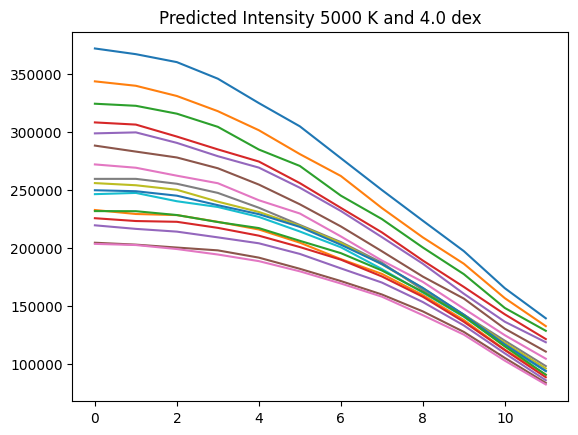

In [7]:
plt.figure()
plt.plot(output_Imu_separated_mu)
plt.title('Predicted Intensity '+str(a) + ' K and ' + str(b) + ' dex')

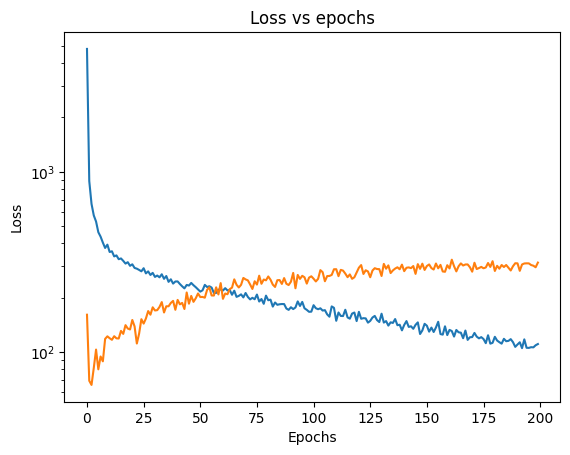

In [8]:
loss = pd.read_csv('/home/nebrahimkutt/SPICA/NN_MIRCX/loss_MIRCX_LR_17wlen.txt', sep = '\t', header = 0)

# %matplotlib qt

plt.figure()
plt.plot(loss['ls'])
plt.plot(loss['ls_eval'])  
plt.yscale('log') 

plt.title('Loss vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

0 tensor([5.9250, 4.4300])


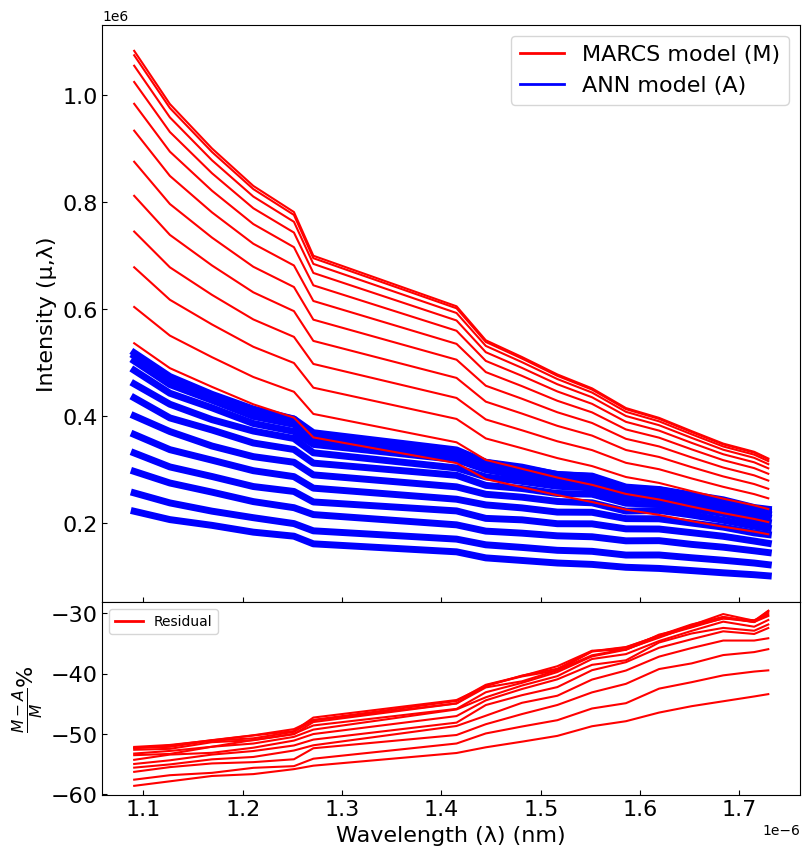

1 tensor([6.0970, 4.4700])


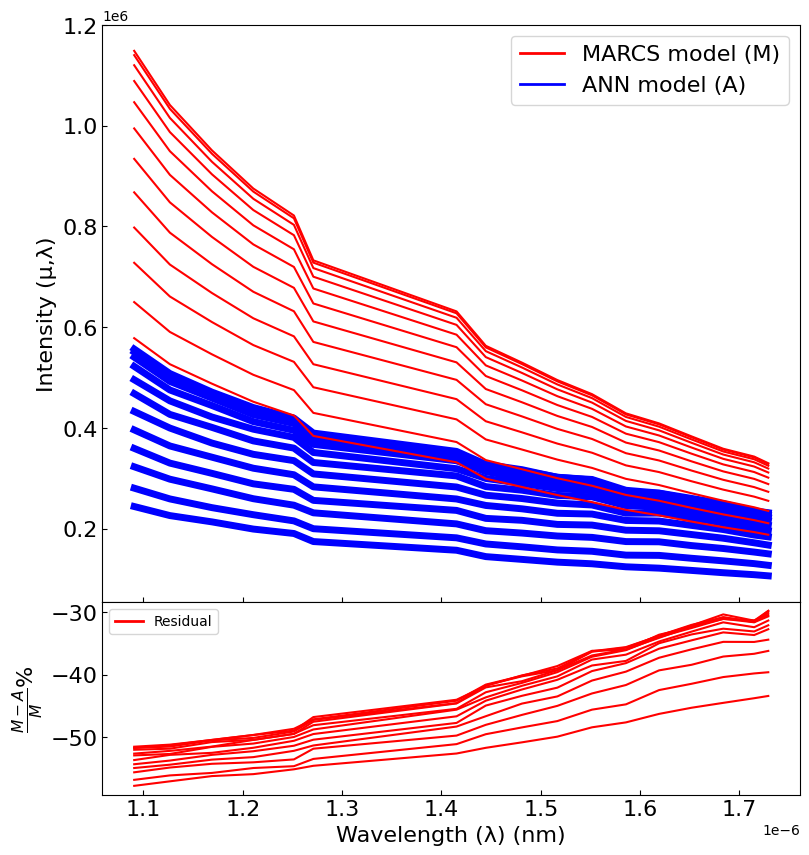

2 tensor([5.1580, 4.1600])


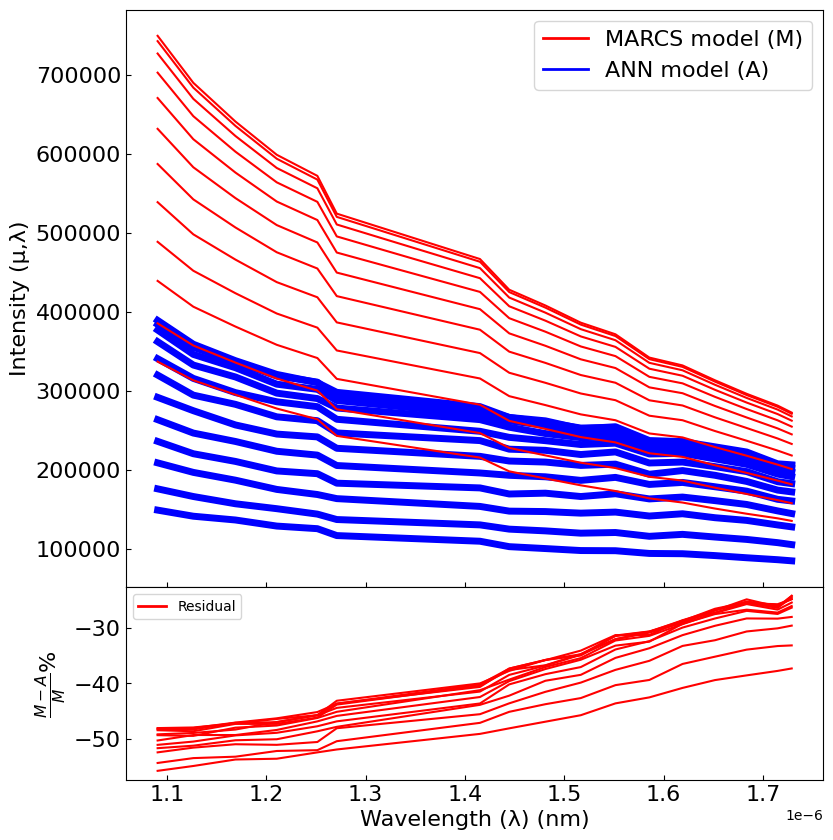

3 tensor([6.3150, 4.7700])


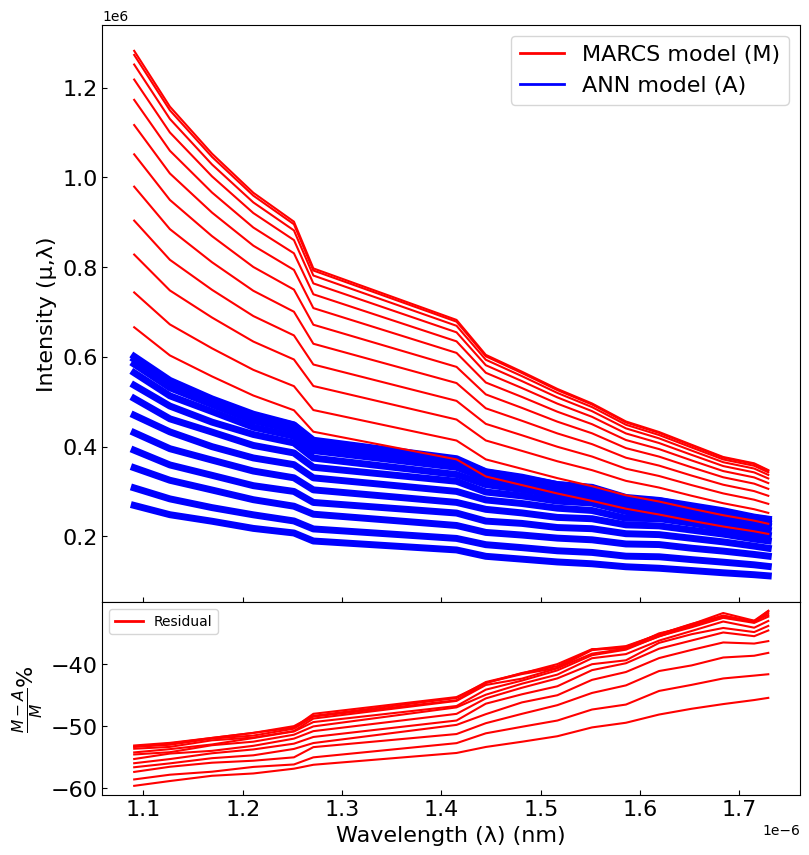

4 tensor([5.0190, 4.5400])


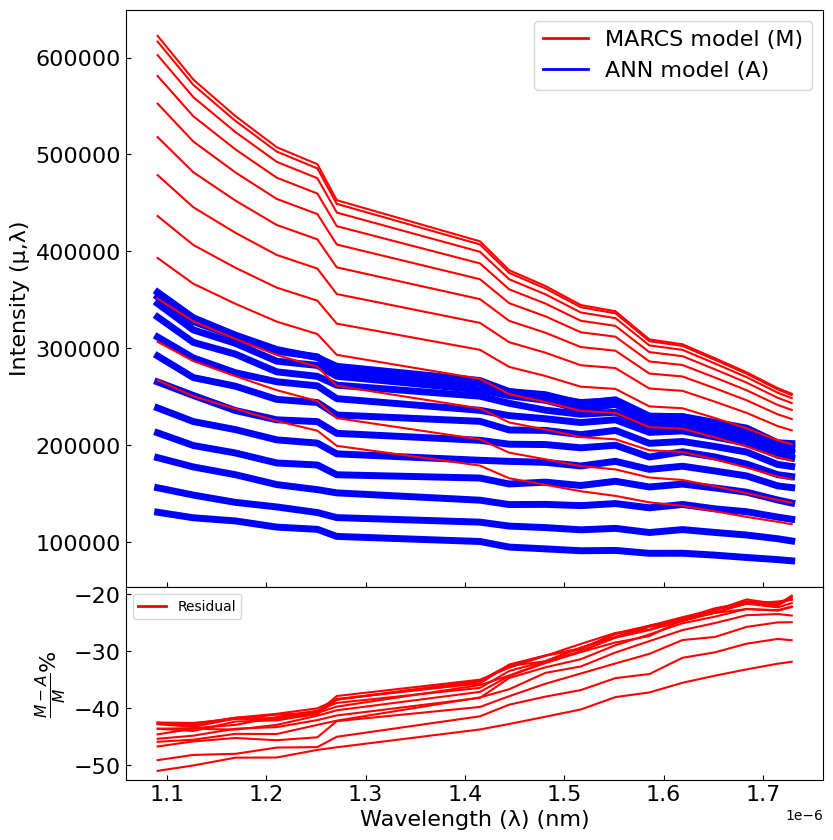

5 tensor([5.4930, 3.3700])


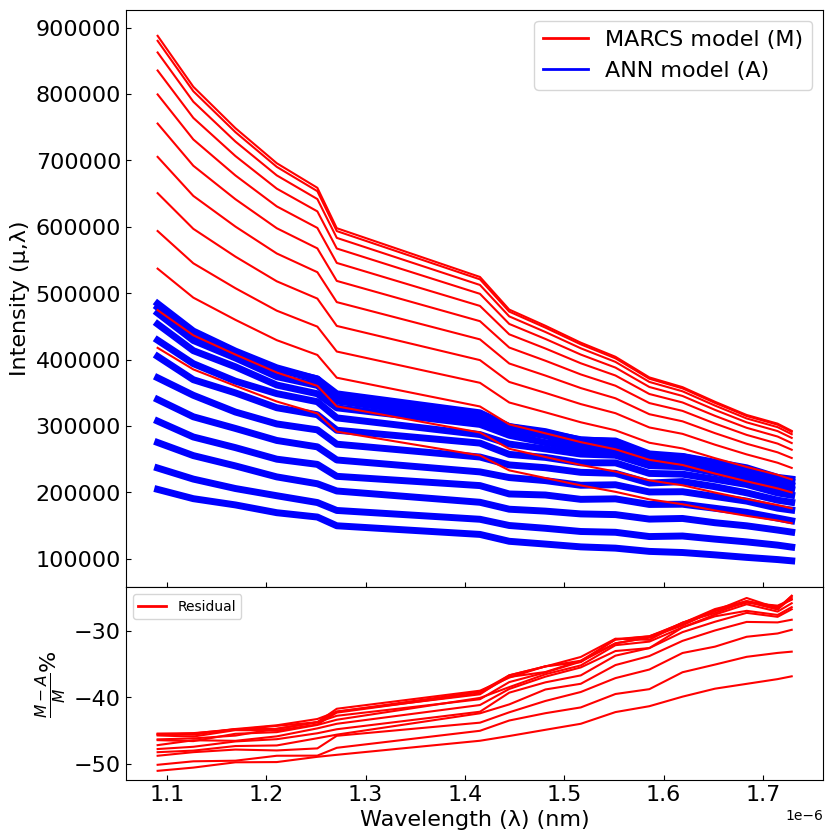

6 tensor([5.6840, 3.6500])


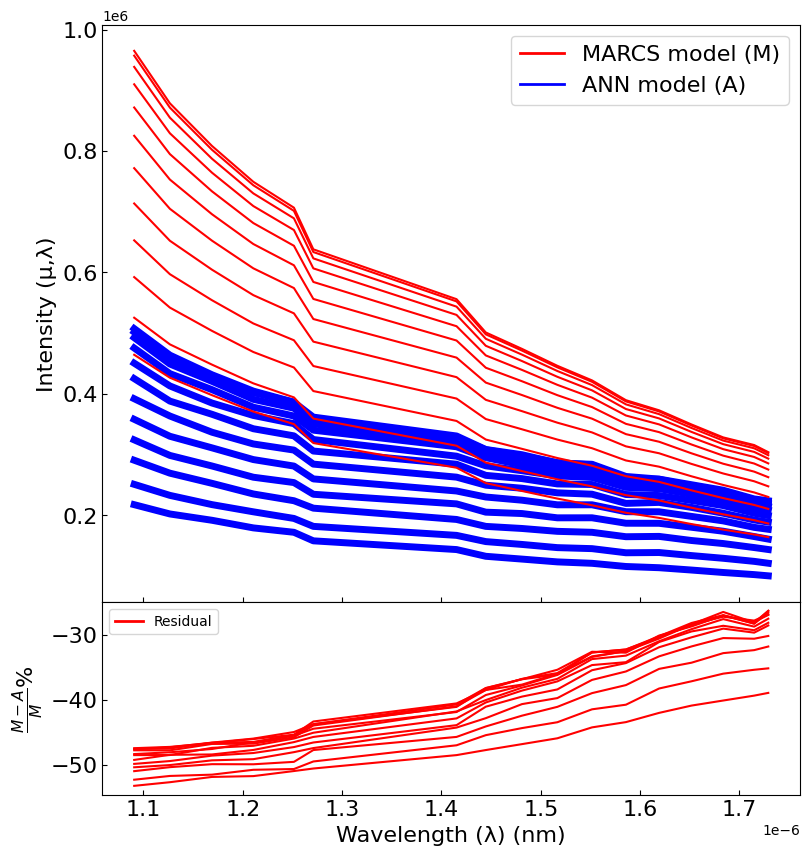

7 tensor([4.7170, 3.0200])


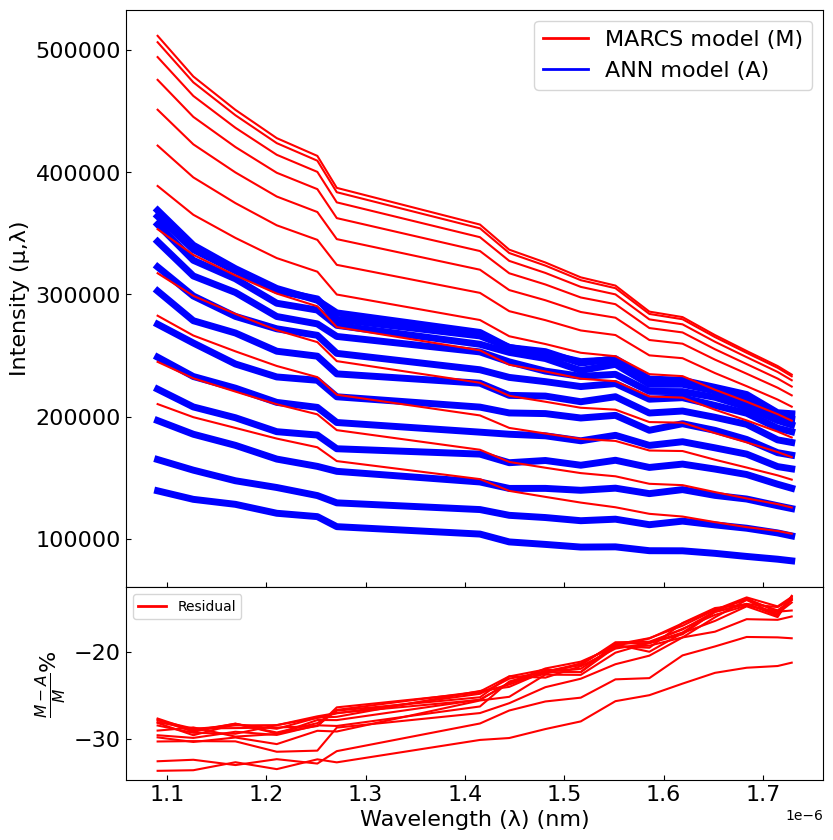

8 tensor([6.7960, 4.6800])


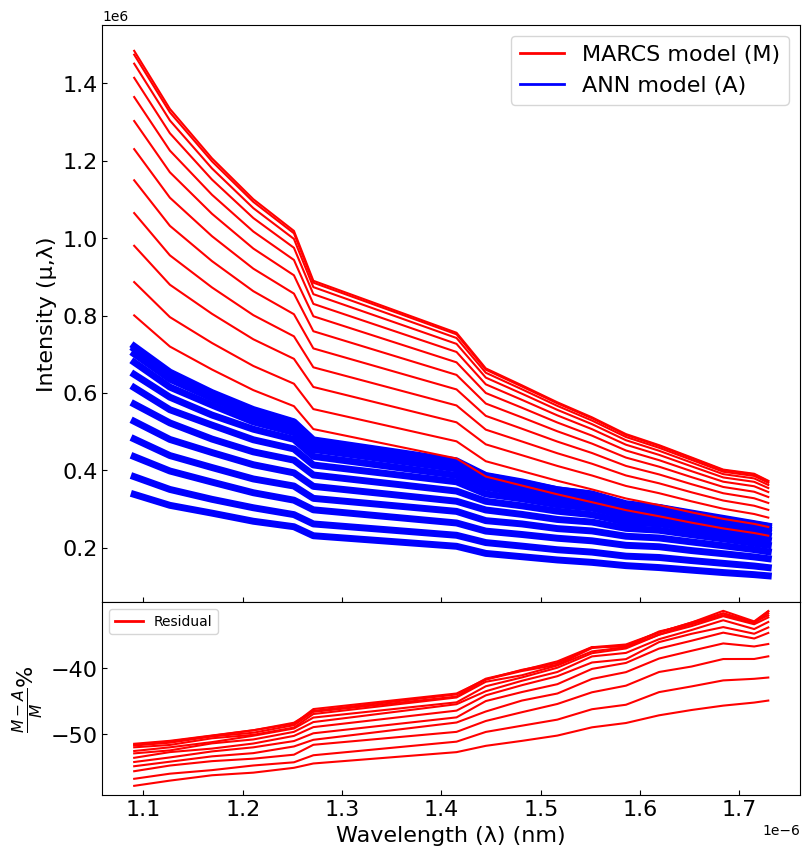

9 tensor([4.7220, 3.1100])


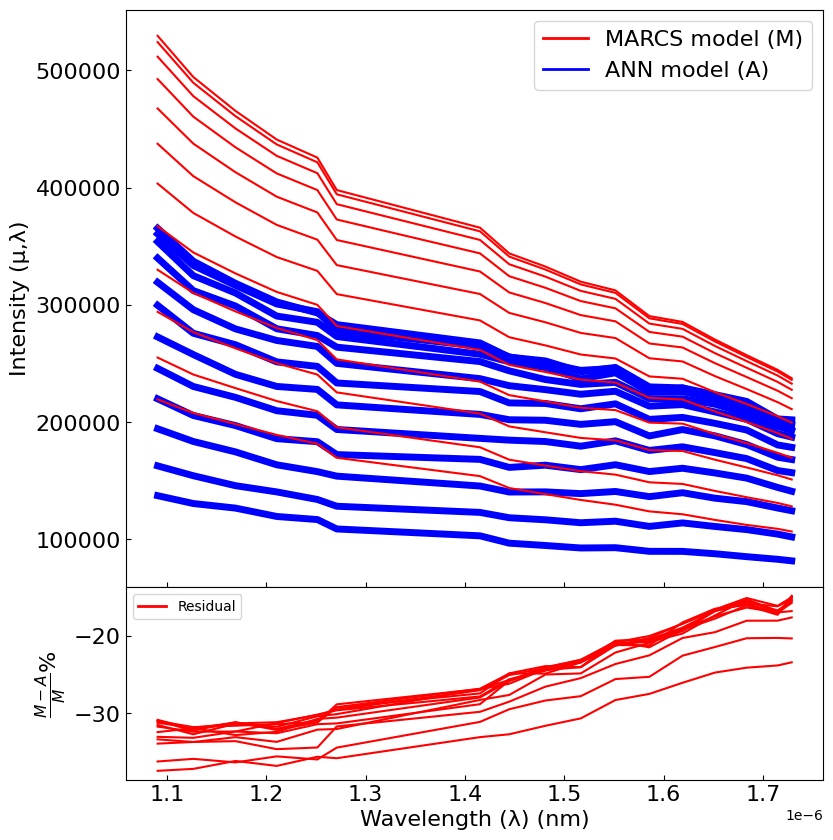

10 tensor([5.7570, 4.7100])


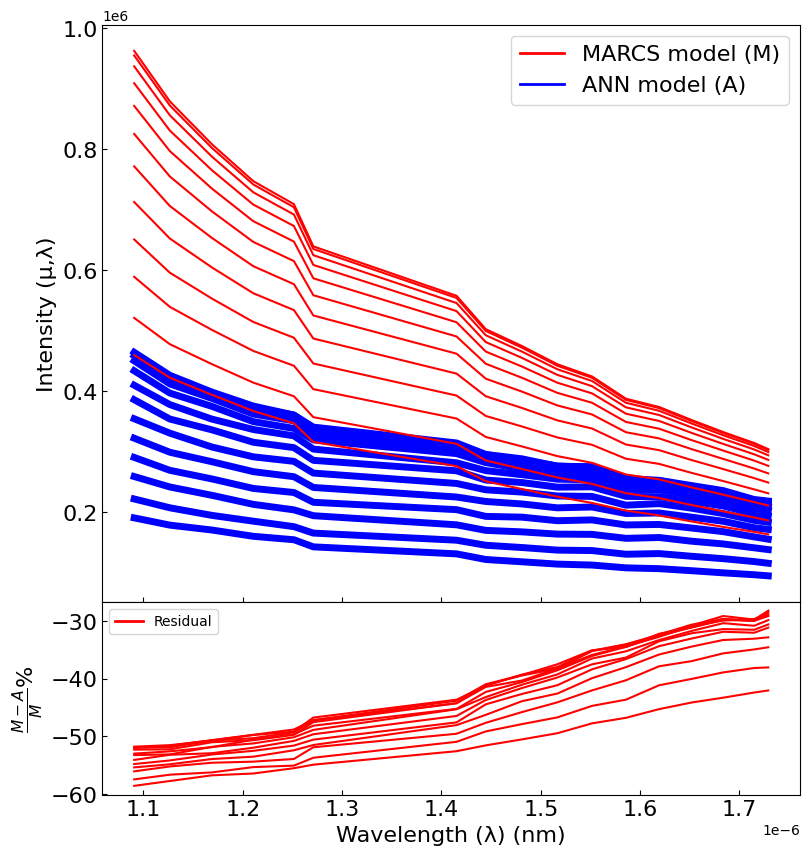

11 tensor([6.0600, 3.4000])


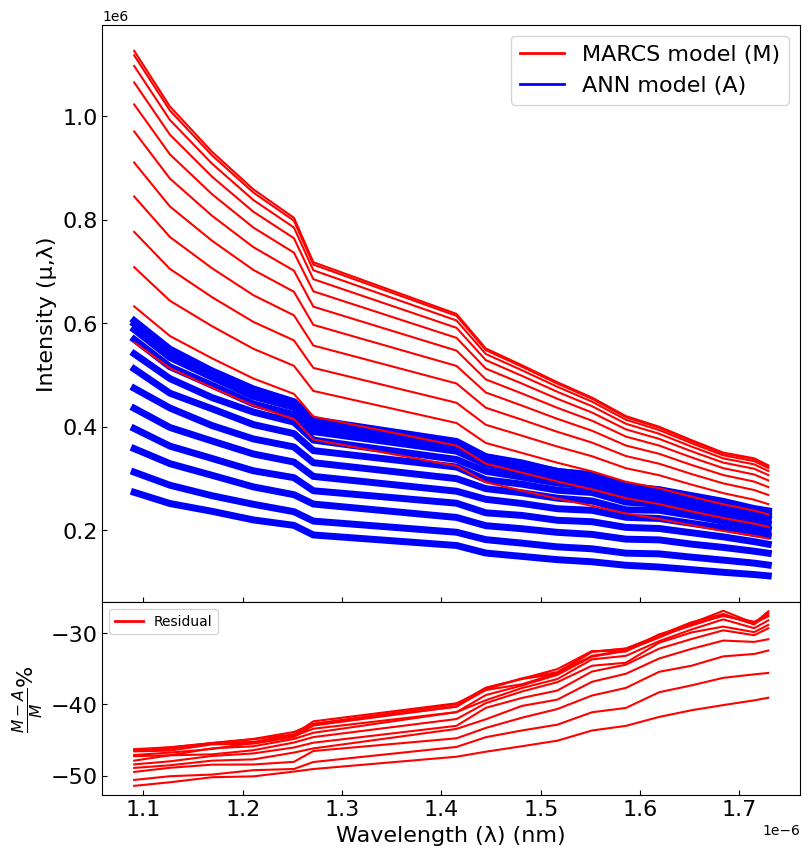

12 tensor([5.4070, 3.2200])


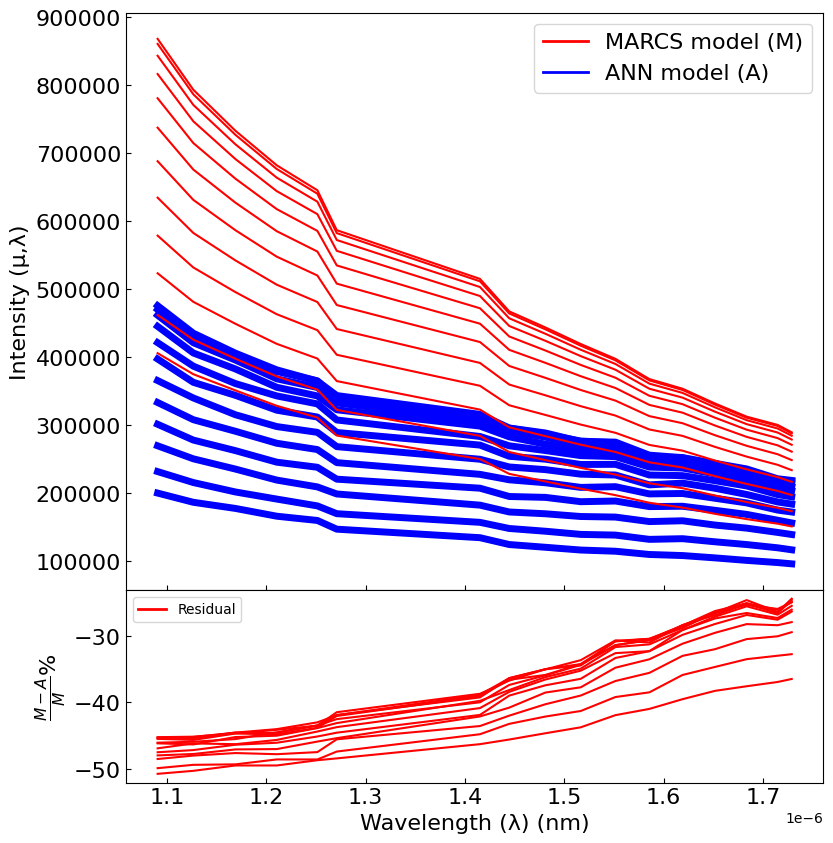

13 tensor([5.6120, 4.4300])


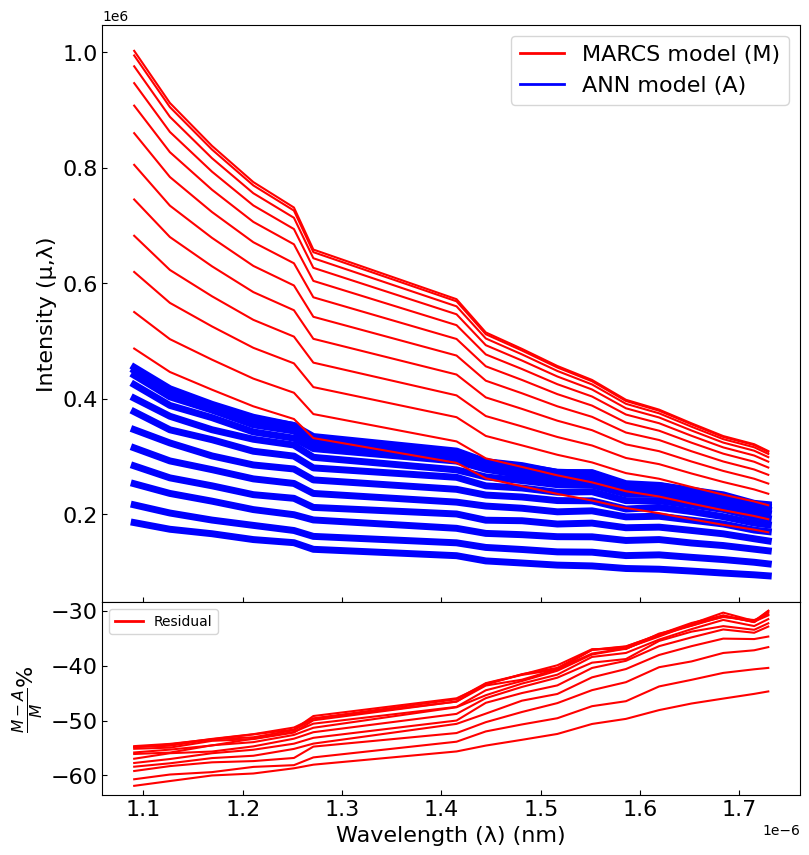

14 tensor([4.8600, 4.9000])


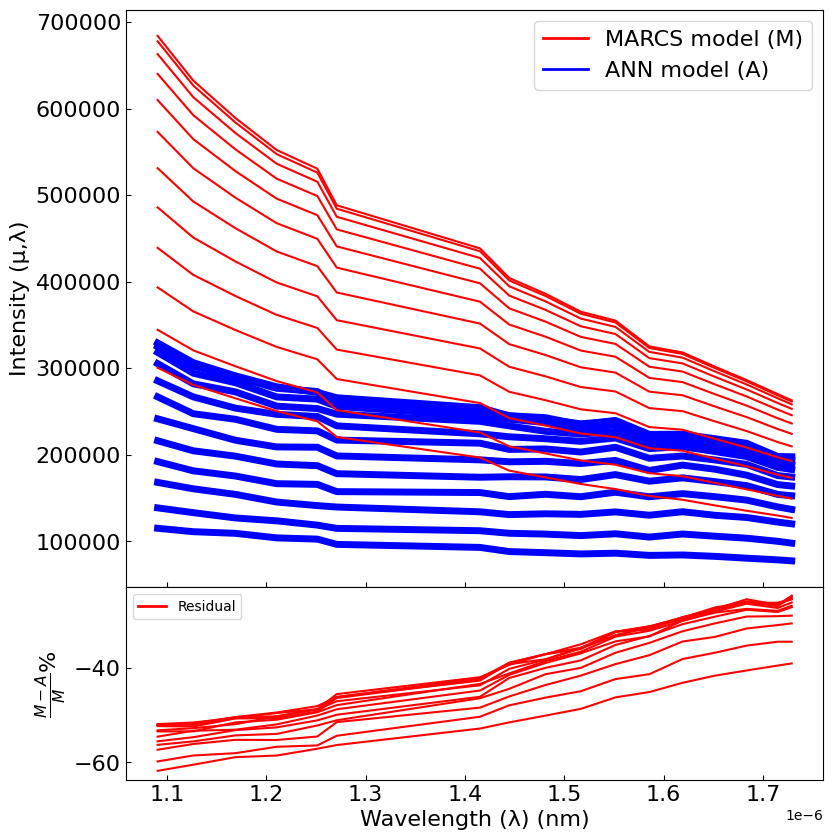

15 tensor([5.3850, 3.4600])


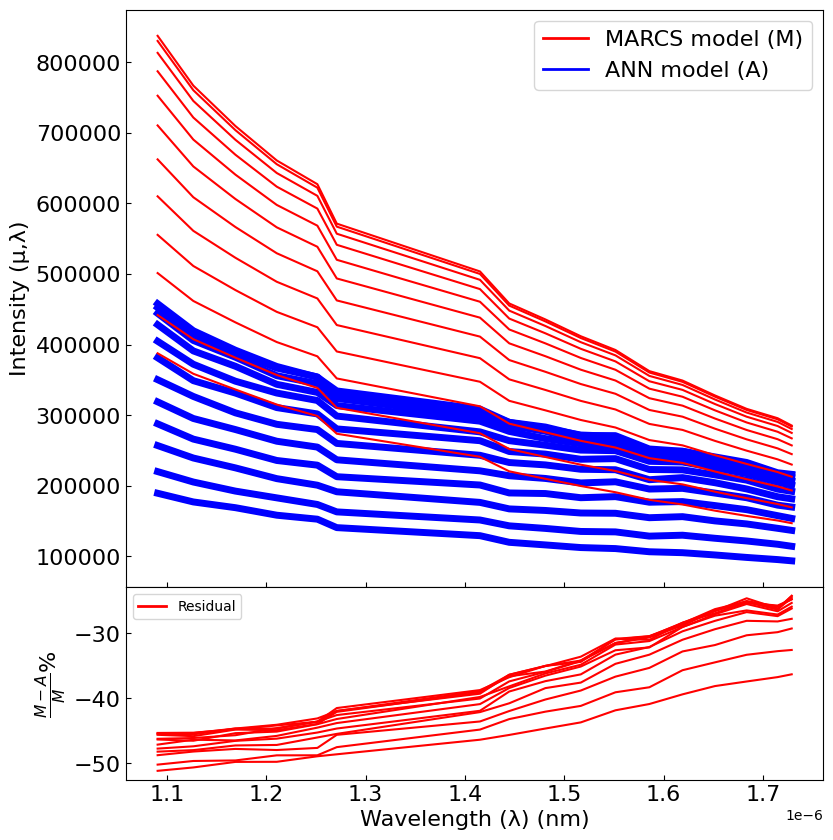

16 tensor([6.3740, 3.2600])


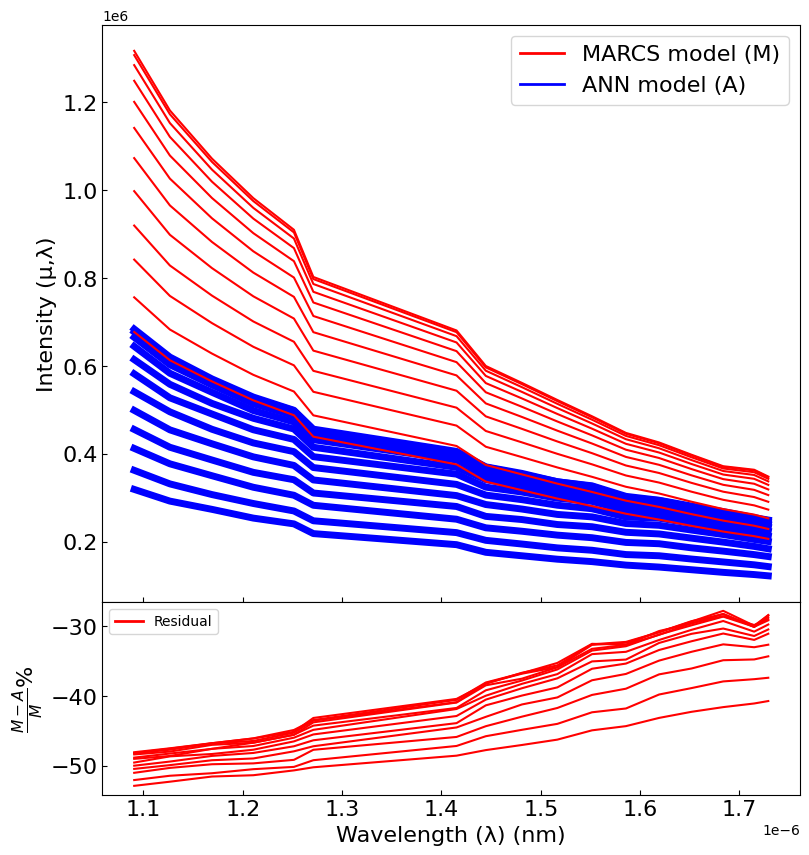

17 tensor([5.8660, 4.3800])


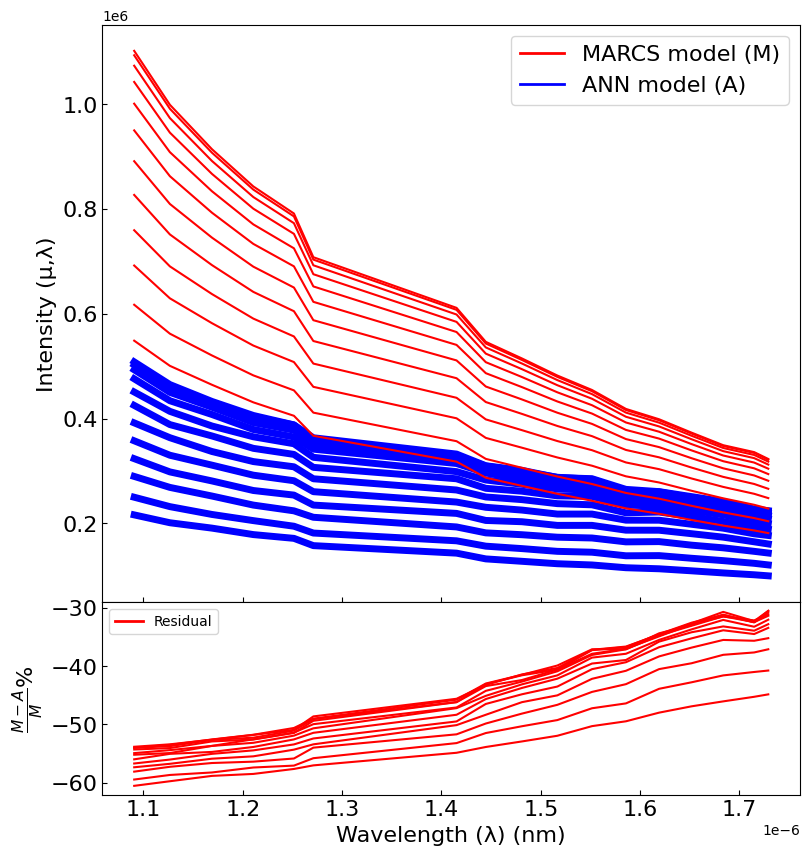

18 tensor([4.8060, 4.4900])


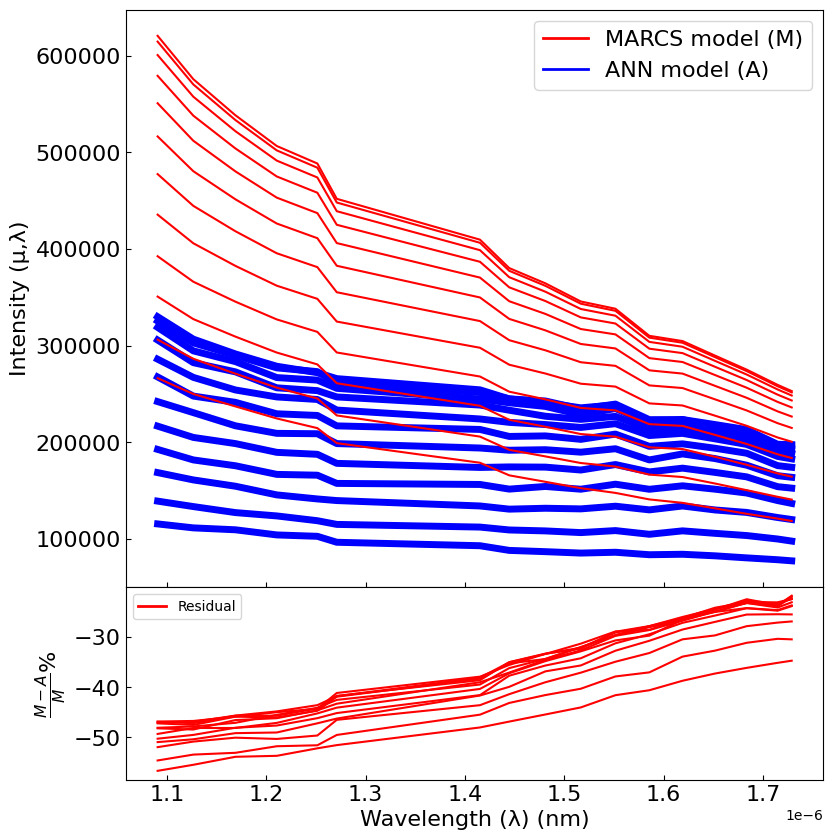

19 tensor([5.4660, 4.8700])


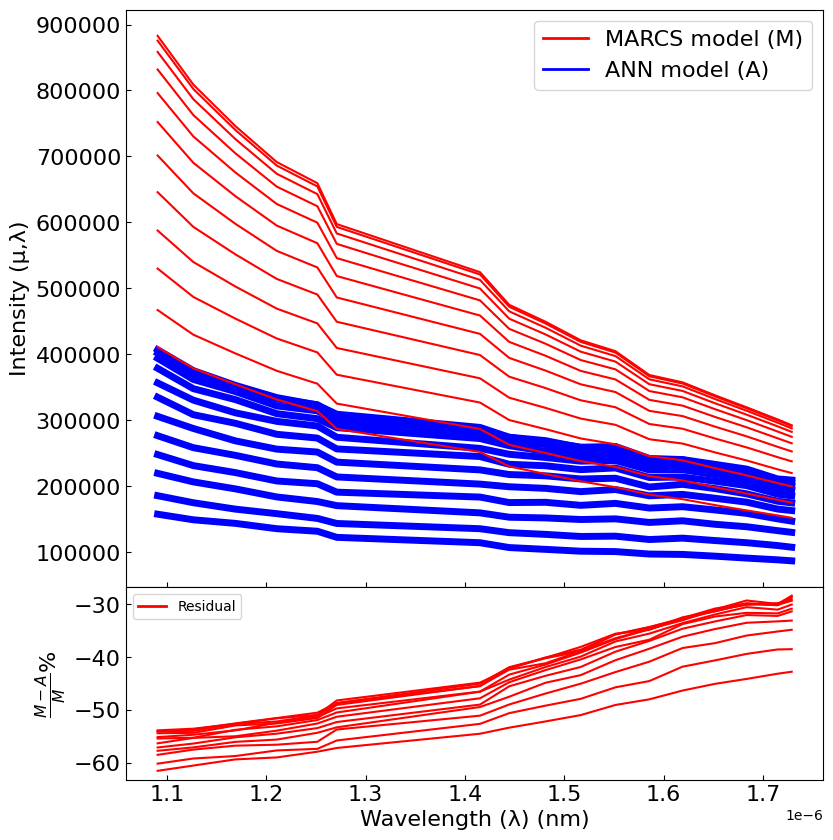

20 tensor([6.2070, 3.7600])


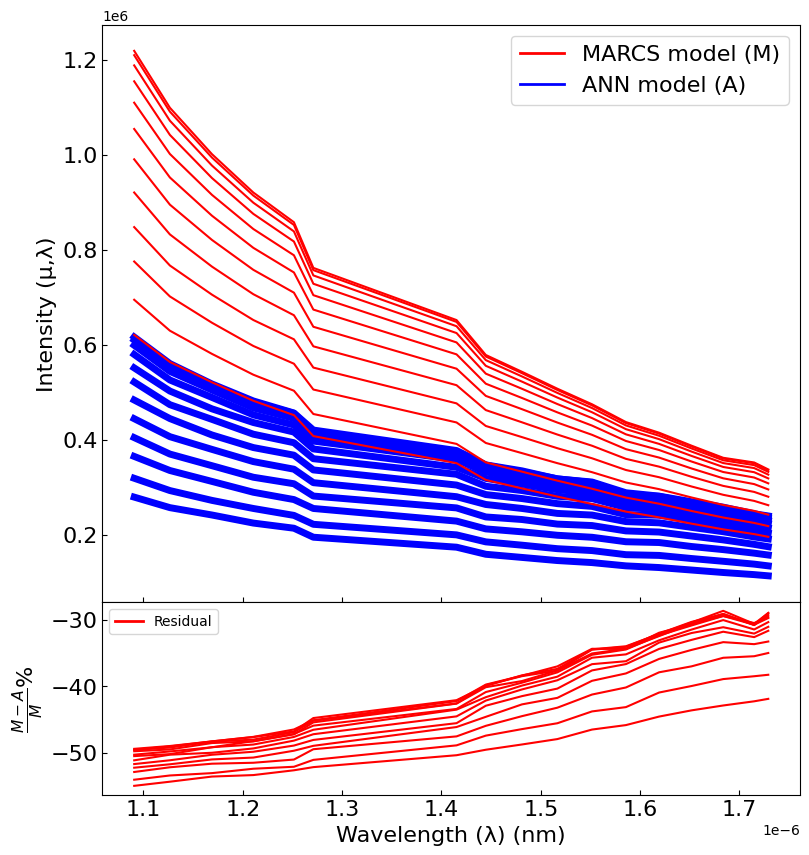

In [9]:

""" testing is done using the 5% data kept aside as testing data """
custom_lines = [Line2D([0], [0], color= 'red', lw=2),
                Line2D([0], [0], color='blue', lw=2)]
custom_lines2 = [Line2D([0], [0], color= 'red', lw=2)]

#%%
for idx,data_test in enumerate(test_loader):
    y_pred = model(data_test[0])
    k = np.random.randint(10)
    # error = ((np.reshape(y_pred[k].detach().numpy()*100000,(59,12))-np.reshape(data_test[1][k].detach().numpy()*100000,(59,12)))/np.reshape(data_test[1][k].detach().numpy()*100000,(59,12)))*100
    print(idx,data_test[0][3])
    fig, axs = plt.subplots(2, 1, figsize=(9,10), gridspec_kw={'height_ratios': [3, 1]})
    axs[0].plot(wlen_m, np.reshape(y_pred[3].detach().numpy()*100000,(17,12)),color='b',linewidth='5', label='ANN model (A)')
    axs[0].plot(wlen_m,np.reshape(data_test[1][3].detach().numpy()*100000,(17,12)),color='r',label='MARCS model (M)')
    axs[0].set_xlabel('Wavelength (\u03BB) (nm)',fontsize=16)
    axs[0].set_ylabel('Intensity (\u03BC,\u03BB)',fontsize=16)
    # axs[0].title('Intensity vs wavelength for different Radau points')
    axs[0].legend(custom_lines,['MARCS model (M)','ANN model (A)'],fontsize=16)
    axs[0].axes.xaxis.set_ticklabels([])
    axs[0].tick_params(axis="both", direction="in", labelsize =16)
    # axs[0].grid()

    axs[1].plot(wlen_m, (np.reshape(y_pred[3].detach().numpy()*100000,(17,12))-np.reshape(data_test[1][3].detach().numpy()*100000,(17,12)))/np.reshape(data_test[1][3].detach().numpy()*100000,(17,12))*100,color='r', label='Residual')
    axs[1].set_xlabel('Wavelength (\u03BB) (nm)',fontsize=16)
    axs[1].set_ylabel(r'$\frac{M-A}{M} \%$',fontsize=16)
    # axs[1].title('Intensity vs Radau points at different wavelength')
    axs[1].legend(custom_lines2,['Residual'])
    # axs[1].grid()
    axs[1].tick_params(axis="both", direction="in", labelsize =16)
    plt.subplots_adjust(wspace=0, hspace=0)
    # plt.savefig('test_training/figure_l'+str(idx)+'.pdf')
    plt.show()
    